<a href="https://colab.research.google.com/github/fainsteinf/DNL_1C2022/blob/main/Embeddings_lorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Embeddings**

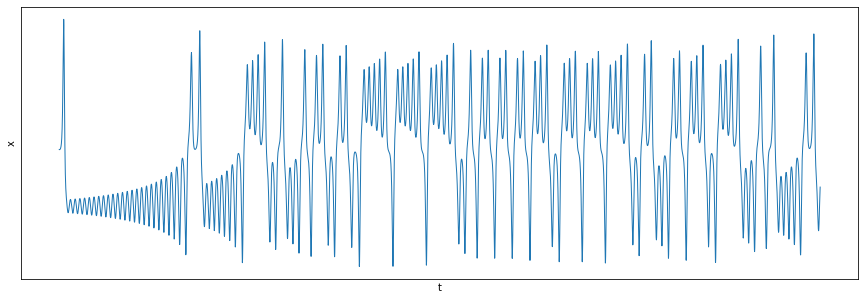

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

def f(v, t):
  sigma, beta, rho =10, 8/3 , 28

  x,y, z = v[0],v[1],v[2]

  dxdt = sigma * (y - x)
  dydt = x * (rho - z) - y
  dzdt = x*y - beta * z 

  return [dxdt, dydt, dzdt]

dt = 0.01
t = np.arange(0, 100, dt)
sol = odeint(f, [0.1, 0, 0], t)

x, y, z = sol[:,0], sol[:,1], sol[:,2]

plt.figure(figsize=(15,5))
plt.plot(t, x, lw=1)
plt.xticks([])
plt.yticks([])
plt.xlabel("t")
plt.ylabel("x")
plt.show()

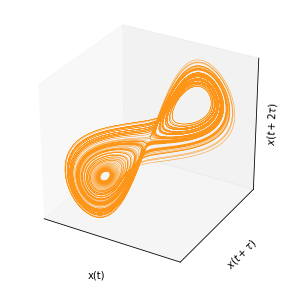

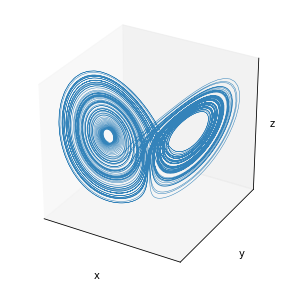

In [ ]:
def embedding(x, tau):
  emb = []
  for k in range(len(x)-int(2*tau)):
    emb.append([x[k], x[k+tau], x[k+int(2*tau)]])
  return np.array(emb)

emb = embedding(x, 8)

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
ax.plot(emb[100:, 0], emb[100:,1], emb[100:,2], lw=0.5, alpha=.9, 
        color='darkorange')
ax.grid(False)
# plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel("x(t)")
ax.set_ylabel(r"$x(t+\tau)$")
ax.set_zlabel(r"$x(t+2\tau)$", labelpad=-10)
plt.show()

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
ax.plot(x[100:], y[100:], z[100:], lw=0.5, alpha=.9)
ax.grid(False)
# plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z", labelpad=-10)

plt.show()

**Dimensionalidad usando SVD**

No handles with labels found to put in legend.


EL shape de x (9500, 12)
El shape de U (9500, 12)
El shape de S (12,)
El shape de Vt (12, 12)


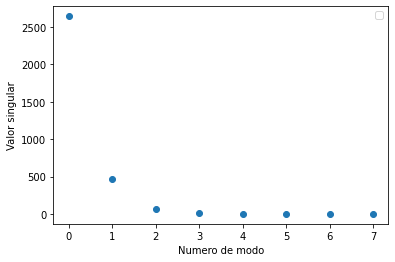

In [ ]:
#Embedding dimension
u = np.array([x[400:-100],x[401:-99], x[402:-98], x[403:-97], 
              x[404:-96], x[405:-95], x[406:-94], x[407:-93], 
              x[408:-92], x[409:-91], x[410:-90], x[411:-89]])

# print(u.shape)

#Ahora le hacemos svd
u_svd = u.T 
U, s, Vt = np.linalg.svd(u_svd, full_matrices=False)

print("EL shape de x", u_svd.shape)
print("El shape de U", U.shape)
print("El shape de S", s.shape)
print("El shape de Vt", Vt.shape)

plt.figure()
plt.scatter(np.arange(8), s[0:8])
plt.xlabel("Numero de modo")
plt.ylabel("Valor singular")
plt.legend()
plt.show()




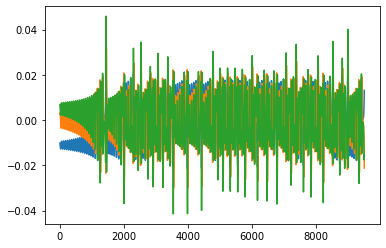

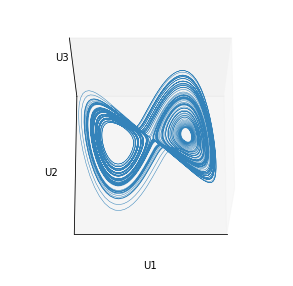

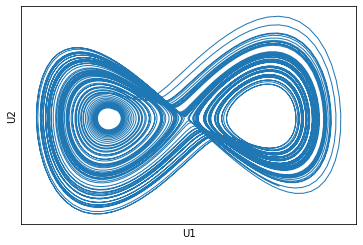

In [ ]:
plt.plot(U[:,0])
plt.plot(U[:,1])
plt.plot(U[:,2])


fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
ax.plot(U[:,0], U[:,1], U[:,2], lw=0.5, alpha=.9)
ax.grid(False)
# plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("U1")
ax.set_ylabel("U2")
ax.set_zlabel("U3", labelpad=-10)
ax.view_init(90-20, 90)

plt.show()

plt.plot(U[:,0], U[:,1], lw=1)
plt.xlabel("U1")
plt.ylabel("U2")
plt.xticks([])
plt.yticks([])
plt.show()
